<a href="https://colab.research.google.com/github/mubasshar009/ML_DL_Model/blob/master/Reuteres_Multiclass_CLassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying newswires:
## a multiclass classification example

In [ ]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
type(train_data[0])

list

# Listing 3.13 Decoding newswires back to text

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


557056/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[0]

3

# 3.5.2 Preparing the data
## Listing 3.14 Encoding the data

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

In [ ]:
def to_one_hot(labels,dimension = 46):
  results = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1.

  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels =  to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# 3.5.3 Building your network

In [11]:
from keras import models
from keras import layers

In [12]:
model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

# Listing 3.16 Compiling the model

In [13]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

# Listing 3.17 Setting aside a validation set

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Listing 3.18 Training the model

In [15]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 0s 27ms/step - loss: 2.4875 - accuracy: 0.4949 - val_loss: 1.6227 - val_accuracy: 0.6590
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.3625 - accuracy: 0.7061 - val_loss: 1.2923 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0392 - accuracy: 0.7726 - val_loss: 1.1154 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8212 - accuracy: 0.8211 - val_loss: 1.0361 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6557 - accuracy: 0.8586 - val_loss: 0.9892 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5297 - accuracy: 0.8875 - val_loss: 0.9453 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4220 - accuracy: 0.9088 - val_loss: 0.9248 - val_accuracy: 0.8000
Epoch 8/20
16

# Listing 3.19 Plotting the training and validation loss

In [16]:
import matplotlib.pyplot as plt

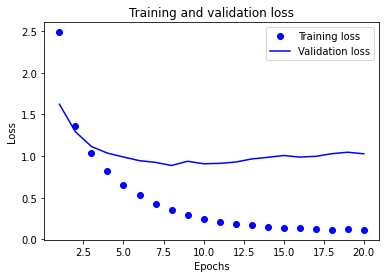

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss) + 1)

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Listing 3.20 Plotting the training and validation accuracy

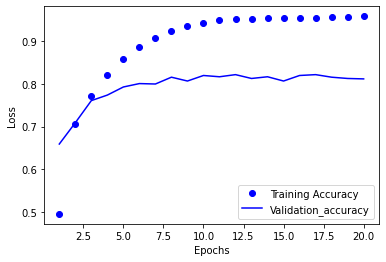

In [22]:
plt.clf()

acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

plt.plot(epochs,acc,'bo',label = 'Training Accuracy')
plt.plot(epochs,valid_acc,'b',label = 'Validation_accuracy')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Listing 3.21 Retraining a model from scratch

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))


In [24]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics =['acc'])

In [30]:
history = model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))


Epoch 1/9
16/16 [==============================] - 0s 18ms/step - loss: 0.2498 - acc: 0.9425 - val_loss: 0.9033 - val_acc: 0.8240
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 0.2138 - acc: 0.9478 - val_loss: 0.9144 - val_acc: 0.8240
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 0.1873 - acc: 0.9523 - val_loss: 0.9304 - val_acc: 0.8150
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.1707 - acc: 0.9529 - val_loss: 0.9337 - val_acc: 0.8130
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.1555 - acc: 0.9540 - val_loss: 0.9734 - val_acc: 0.8080
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.1434 - acc: 0.9554 - val_loss: 0.9599 - val_acc: 0.8230
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.1329 - acc: 0.9575 - val_loss: 1.0353 - val_acc: 0.7970
Epoch 8/9
16/16 [==============================] - 0s 15ms/step - loss: 0.1252 - acc: 0.95

In [26]:
results = model.evaluate(x_test,one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 0.9766 - acc: 0.7854


In [34]:
print('Model Accuracy On Test Data:{}'.format(results[1] * 100))
print('Model Accuracy On Training Data:{}'.format(history.history['acc'][8] * 100))


Model Accuracy On Test Data:78.53962779045105
Model Accuracy On Training Data:95.5775499343872


In [35]:
import copy

In [36]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/ len(test_labels)

0.1918967052537845

# 3.5.5 Generating predictions on new data

In [37]:
predictions = model.predict(x_test)

In [40]:
predictions[0].shape

(46,)

In [41]:
np.sum(predictions[0])

0.99999994

In [42]:
np.argmax(predictions[0])

3